<a href="https://colab.research.google.com/github/octaviasst/LEARN-CNN/blob/main/GET_DATA_PPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

read dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CNN-TESIS/data-ppg/a44088.csv',header=None) 

In [ ]:
df.shape

(15000, 3)

In [ ]:
df.head()

,0,1,2
0,0.314453,0.584555,76.466803
1,0.359375,0.580645,75.684534
2,0.574219,0.576735,74.902265
3,0.599609,0.570870,74.119996
4,0.509766,0.565005,73.533294


### EDA

x train = x ppg (ganjil)

x test = x ppg (genap)

y train = y ppg peak 

y test = y ppg peak ( sisanya )

In [ ]:
ppg = df[1]

ambil 1000 an data

In [ ]:
len(ppg)

15000

In [ ]:
ppg.head()

0    0.584555
1    0.580645
2    0.576735
3    0.570870
4    0.565005
Name: 1, dtype: float64

find x train (ganjil)

-konsul yg ini

In [ ]:
xtrain = ppg % 2 ==0

In [ ]:
xtrain.head

<bound method NDFrame.head of 0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Name: 1, Length: 15000, dtype: bool>

In [ ]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 5.5 MB/s 


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import neurokit2 as nk
from scipy.signal import find_peaks

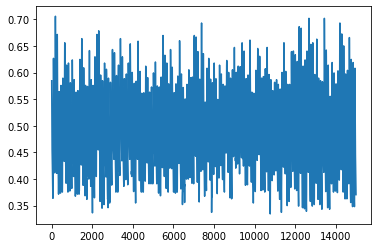

In [ ]:
plt.plot(ppg)

In [ ]:
ppg01 = ppg[60:400]

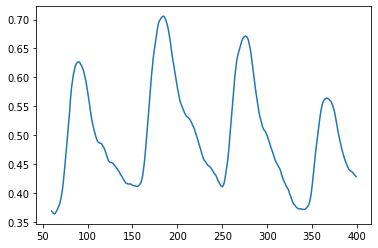

In [ ]:
plt.plot(ppg01)

finding peak

posisi titik puncak : [   90.   184.   276.   366.   453.   463.   552.   646.   735.   828.
   921.  1016.  1106.  1202.  1293.  1391.  1485.  1577.  1669.  1765.
  1860.  1949.  2041.  2134.  2229.  2318.  2411.  2506.  2605.  2630.
  2698.  2798.  2897.  2996.  3025.  3092.  3194.  3293.  3389.  3432.
  3484.  3583.  3681.  3779.  3802.  3873.  3971.  4067.  4164.  4176.
  4191.  4257.  4351.  4444.  4540.  4635.  4729.  4824.  4919.  5016.
  5112.  5205.  5300.  5394.  5487.  5579.  5673.  5766.  5858.  5942.
  5952.  6036.  6124.  6216.  6303.  6393.  6485.  6578.  6670.  6759.
  6847.  6935.  7027.  7054.  7115.  7205.  7296.  7386.  7475.  7564.
  7655.  7742.  7831.  7921.  8008.  8095.  8184.  8274.  8297.  8360.
  8450.  8539.  8628.  8721.  8812.  8909.  8934.  9004.  9097.  9191.
  9288.  9313.  9384.  9480.  9579.  9675.  9772.  9866.  9964. 10061.
 10157. 10251. 10343. 10437. 10529. 10618. 10711. 10802. 10894. 10987.
 11083. 11169. 11260. 11353. 11446. 11536. 11632. 11724

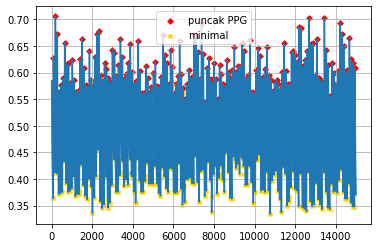

In [ ]:
  # x and y definition
  x= np.linspace(0,14999,15000) 
  y= ppg

  #find peak
  peaks = find_peaks(y, height=0.5, threshold=0, distance=10)
  height = peaks[1]['peak_heights']
  peak_post= x[peaks[0]]

  
print("posisi titik puncak :", peak_post)


#menemukan nilai minimum
y2=y*-1
minima=find_peaks(y2)
min_pos=x[minima[0]]
min_height=y2[minima[0]]

#print titik puncak
peak_coordinate=peak_post
    #print(peak_coordinate)
#banyaknya puncak
    # print(len(peak_coordinate)) 
    #output 40
#data titik ke2 sampai 40
data1=peak_coordinate[1:]
#data titik ke1-39
data2=peak_coordinate[:-1]
#jarak antar puncak (pengurangan array)
distance= data1-data2
#mencari rata-rata jarak
total = np.sum(distance)
totaldistance = total
average= totaldistance/len(distance)
#pengolahan data delay 10
# RR = 10*average
# HR= 60000/RR

#pengolahan data delay 05
RR=average*5
HR=60000/RR

#print(min(peak_post))
print("----------------------------------------------------------------------")
print("jarak antar puncak :", distance)   #selisih
print("----------------------------------------------------------------------")
print("jarak terdekat :", min(distance))
print("----------------------------------------------------------------------")
print("jarak terjauh :", max(distance))
print("----------------------------------------------------------------------")
print("rata-rata jarak :", average)
print("----------------------------------------------------------------------")
print("banyaknya peak :", len(distance))
print("----------------------------------------------------------------------")
print("jumlah jarak:", total)
print("----------------------------------------------------------------------")
print("HR", HR)

#plotting
fig = plt.figure()
ax= fig.subplots()
ax.plot(x,y)
ax.scatter(peak_post, height, color='r', s=15, marker='D', label='puncak PPG')
ax.scatter(min_pos, min_height*-1, color='gold', s=15, marker='X', label='minimal')
ax.legend()
ax.grid()
plt.show()

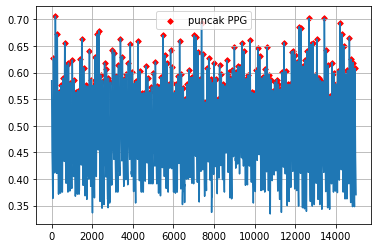

In [ ]:
fig = plt.figure()
ax= fig.subplots()
ax.plot(x,y)
ax.scatter(peak_post, height, color='r', s=15, marker='D', label='puncak PPG')
#ax.scatter(min_pos, min_height*-1, color='gold', s=15, marker='X', label='minimal')
ax.legend()
ax.grid()
plt.show()

### CNN MODEL

In [ ]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

### training data

menyamakan shape

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)
y_train.shape

NameError: ignored

mulai training

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

plotting hasil

In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

NameError: ignored